In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
import graphviz
import numpy as np
import pandas as pd
import pydotplus
import scipy.stats as stats
import timeit
from sklearn.utils import column_or_1d 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_excel("Telecom.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data exploration & visualization

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see that there are a total of 7043 observers.

The % distribution of Gender is: 
Male      50.0
Female    50.0
Name: gender, dtype: float64


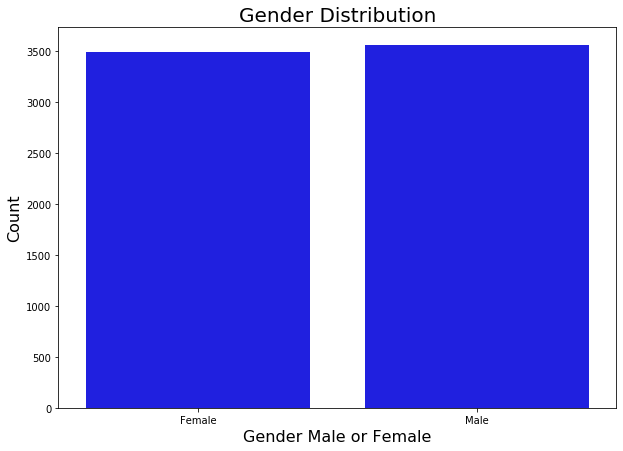

Male      3555
Female    3488
Name: gender, dtype: int64

In [4]:
# Gender 

print("The % distribution of Gender is: ")
print(round(df['gender'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(df["gender"], color='blue')
g.set_title("Gender Distribution", fontsize=20)
g.set_ylabel('Count', fontsize=16)
g.set_xlabel('Gender Male or Female', fontsize=16)

plt.show()

df['gender'].value_counts()

We can see that 50% of customers are male and 50% are female. This means this dataset is a balanced data set.

The % distribution of Churn is: 
No     73.0
Yes    27.0
Name: Churn, dtype: float64


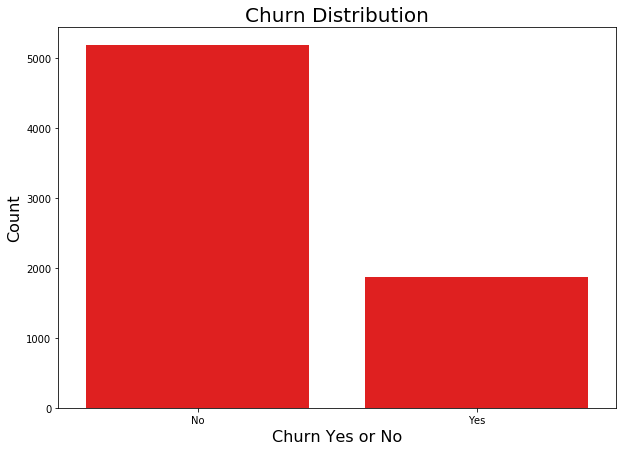

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
# Churn 

print("The % distribution of Churn is: ")
print(round(df['Churn'].value_counts(normalize=True),2)*100)

plt.figure(figsize=(10,7))

g = sns.countplot(df["Churn"], color='red')
g.set_title("Churn Distribution", fontsize=20)
g.set_ylabel('Count', fontsize=16)
g.set_xlabel('Churn Yes or No', fontsize=16)

plt.show()
df['Churn'].value_counts()

We can see that 73% of customers churn and 27% do not churn.

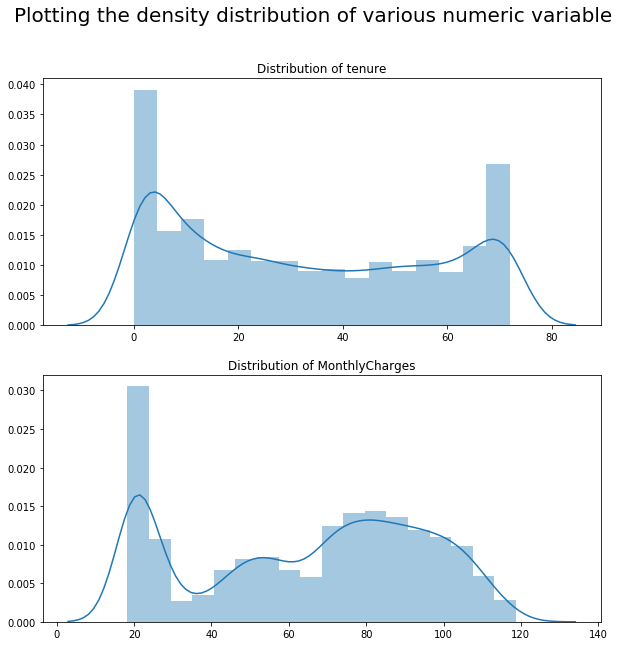

In [6]:
def draw_subplots(var_Name,tittle_Name,nrow=1,ncol=1,idx=1,fz=10): # Define a common module for drawing subplots.
    ax = plt.subplot(nrow,ncol,idx)                   #  idx - position of subplot in the main plotting window
    ax.set_title('Distribution of '+var_Name)         #  fz - the font size of Tittle in the main plotting window
    plt.suptitle(tittle_Name, fontsize=fz)

numeric_columns = ['tenure', 'MonthlyCharges']

fig,ax = plt.subplots(1,1, figsize=(10,10))
j=0  # reset the counter to plot 
title_Str="Plotting the density distribution of various numeric variable"

for i in numeric_columns:
    j +=1
    draw_subplots(i,title_Str,2,1,j,20) # create a 1x3 subplots for plotting distribution plots
    sns.distplot(df[i])
    plt.xlabel('')

We can get some conclusion from Density plots.First,the Tenure is not normally distribute.The distribution of data is high on both sides and low in the middle.Secondly, the MonthlyCharges is also not normally distribute.This distribution is relatively high at 20, and after 40,this part is generally in a normal distribution trend.

# Convert some categorical variables to numerical variables

In [7]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 2,'Yes': 1, 'No': 0})
df['InternetService'] = df['InternetService'].map({'DSL': 2,'Fiber optic': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'No internet service': 2,'Yes': 1, 'No': 0})
df['Contract'] = df['Contract'].map({'Two year': 2,'One year': 1, 'Month-to-month': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['PaymentMethod'] = df['PaymentMethod'].map({'Credit card (automatic)': 3,'Electronic check': 2,'Mailed check': 1, 'Bank transfer (automatic)': 0})
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,1,56.95,1889.5,No
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,...,0,0,0,0,0,1,1,53.85,108.15,Yes
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes


# Holdout (splitting data)

In [8]:
x = df[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','gender']]
y = df[['Churn']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# 1.Select Kbest

In [9]:
kbest = SelectKBest(chi2)              

param_grid = { 'k': range(2, 8)}

grid_search= GridSearchCV(estimator=kbest, param_grid=param_grid, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

print(" Best_score： %.4lf" %estimator.best_score_)

print(" Best_params：", estimator.best_params_)


c:\users\alan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AttributeError: 'SelectKBest' object has no attribute 'predict'